In [43]:
!pip install ydata-profiling pandas numpy matplotlib seaborn --q

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

# <span style='color:#ff5f27'> 🛠 Data Preprocessing

Earlier, I converted xlsx file with data to the csv, cause it could not read it properly

In [3]:
df_original = pd.read_csv("eadj-fail-then-allowed V2.csv")

C:\Users\kaharlyr\AppData\Local\Temp\1\ipykernel_18968\9056365.py:1: DtypeWarning: Columns (6,22,46,48,49,50,51,52,53,54,55,57,58,59,60,62,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv("eadj-fail-then-allowed V2.csv")


In [4]:
df_original

,ID,WSIB_REFERENCENUMBER,CLAIMANTDENORMID,CLAIMNUMBER,DATERPTDTOEMPLOYER,DATERENDERREPORTSUBMITTED_WC,WSIB_ABANDON,WSIB_INTAKECHANNELNAME,WSIB_FORMTYPENAME,WSIB_ISNEWWORKER,ClaimType_WCNAME,ClaimType_WCNAMEINIT,LOSSDATE,WSIB_CLAIMREGISTRATIONDATE,WSIB_ISEADJUDICATEDHIA,WSIB_ISEADJUDICATEDALLOWED,WSIB_REPORTWORKERRECEIVEDATE,WSIB_REPORTEMPRECEIVEDATE,WSIB_ENTITLEMENTSTATUS,WSIB_EntitlementStatusName,ENTITLEMENTSTATE_WC,ENTITLEMENTSTATE_WCName,DEATHDATE,GECA_Ind,SCHEDULE_TYPE,Claim_Segment,PRIORSIMILARCOND_WC,ACCIDENTCONCERN_WC,RegYear,EAdjudication_Rerun_Count,Initial_EAdjudication_Count,Manual_Change_of_Adjudication_Properties_Count,Manual_EAdjudication_Rerun_Count,InitialEadjDate,InitialEadjType,InitialEadjState,InitialEadjReason,InititalEadjRole,EadjReRunDate_1,EadjReRunType_1,EadjReRunState_1,EadjReRunReason_1,EadjReRunRole_1,EadjReRunDate_2,EadjReRunType_2,EadjReRunState_2,EadjReRunReason_2,EadjReRunRole_2,EadjReRunDate_3,EadjReRunType_3,EadjReRunState_3,EadjReRunReason_3,EadjReRunRole_3,ManEadjReRunDate_1,ManEadjReRunType_1,ManEadjReRunState_1,ManEadjReRunReason_1,ManEadjReRunRole_1,ManEadjReRunDate_2,ManEadjReRunType_2,ManEadjReRunState_2,ManEadjReRunReason_2,ManEadjReRunRole_2,ManAdjDate_1,ManAdjType_1,ManAdjState_1,ManAdjReason_1,ManAdjRole_1,ManAdjDate_2,ManAdjType_2,ManAdjState_2,ManAdjReason_2,ManAdjRole_2,ManAdjDate_3,ManAdjType_3,ManAdjState_3,ManAdjReason_3,ManAdjRole_3,FirstMIEAssignDate,FirstSocDate,AnalysisBucket,FirstMIEAssignToEADate,INIT_DECISION_DATE,Adjusted_Days_to_Initial_Decision,HIA_BU_Days,HIA_Cal_Days,init_claimStatus,init_ClaimType,GENDER,Province,POSTALCODE,DATEOFBIRTH,FIRM_NUM,ACCT_NUM,SCHED_TYP_DESC,TRADE_NAME,NUM_FTE,FULL_TIME_WRKR_BAND,FIRM_IND_SCTR_CD,FIRM_IND_SCTR_DESC,FIRM_MAJOR_RG,ALTCountFirm,ANLTCountFirm,ALTCountAcc,ANLTCountAcc,ZNTR_INJURY1_CD,ZNTR_OF_ACDNT_CD,ZACCDNT_CAT_OPTNS_CD,ZACCDNT_ILLNESS_CAT_CD,ZAREA_INJURY1_CD,HICFlag,OUTOFPROVINCE,THIRDPARTY,LOSTTIMEANTICIPATION,AccidentHistoryModifiedWorkName,NORTWMODIFIEDWORKOFFERED,WSIB_NOMODIFIEDWORKREASON,MWDATEOFOFFER,MWACCEPTANCE,MWDECLINEREASON,TypeOfReturnedWorkName,SubtypeName,FirstICAPClosedDate,FirstSOCassignement,FirstMovedFromSOCassignement,FirstSOCassignementAfterAllowed,FirstMovedFromSOCassignementAfterAllowed,MinPayedFromDate,MaxPayedToDate,HCRECEIVEDDATE,ISADDRESSFOROFFSITEJOB_WC,Risk_score_dt,Risk_score,Risk_grp
0,5203157,82051356,19395977,31104050,2018-04-17 21:31:00,17Oct2018 14:22:18,True,Teleclaim,Form 6,1,Lost Time,Lost Time,17Apr2018 0:00:00,23Jan2019 12:15:24,NaN,NaN,2018-10-17 14:22:18,NaN,NaN,NaN,10001,Allowed,NaN,N,2,injury_eligibility,0.0,0.0,2019,NaN,1,1,NaN,2019-01-23 07:15:24,LT,Pending,NaN,CRDM Admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-22 10:07:41,LT,Allowed,NaN,EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-23 12:15:24,2019-03-22 14:26:58,NaN,NaN,2019-03-22,0.0,43.0,0.0,Allowed,LT,F,ON,K4K 1L5,1967-06-08 00:00:00,856214,1974573.0,INDIVIDUAL LIABILITY,TRILLIUM GIFT OF LIFE NETWORK (FORMERLY SCH 2),0.0,NONE,S2,SCHEDULE 2,999.0,NaN,NaN,NaN,NaN,RepetativeStrainTypeInjury,RepetativeStrainTypeInjury,RepetitiveForce,GraduallyOccuringOverTime,Chest,unknown,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,LossTimeRTW_WC,NaN,2018-09-21 14:05:20,2019-01-23 12:15:24,2019-03-22 14:26:58,2019-03-27 11:15:38,2018-04-18,2019-06-07,2018-04-18,NaN,NaN,NaN,NaN
1,5313344,82147911,20003547,31166158,2018-11-05 11:00:00,14Nov2018 9:19:19,NaN,eChannel,Form 6,0,Lost Time,Lost Time,05Nov2018 11:00:00,26Mar2019 19:16:56,NaN,NaN,2018-11-14 09:19:19,NaN,NaN,NaN,10001,Allowed,NaN,N,1,injury_eligibility,0.0,0.0,2019,NaN,1,1,NaN,2019-03-26 15:16:56,LT,Pending,NaN,CRDM Admin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-23 11:44:20,LT,Allowed,NaN,ELIGIBILITY LIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-26 19:16:56,2019-04-04 14:12:05,NaN,NaN,2019-05-23,0.0,43.0,0.0,Allowed,LT,M,ON,L1E 2X4,1999-04-02 00:00:0

In [5]:
# columns that Allan advised to use for this analysis
keepcolumns = pd.read_excel("keepcolumns_v2.xlsx")

In [6]:
keepcolumns = keepcolumns.Variables.values

In [7]:
keepcolumns

array(['ACCIDENTCONCERN_WC', 'AccidentHistoryModifiedWorkName',
       'CLAIMNUMBER', 'ClaimType_WCNAME', 'ENTITLEMENTSTATE_WCName',
       'FIRM_IND_SCTR_DESC', 'FULL_TIME_WRKR_BAND', 'GECA_Ind',
       'HCRECEIVEDDATE', 'HICFlag', 'InitialEadjType',
       'ISADDRESSFOROFFSITEJOB_WC', 'LOSTTIMEANTICIPATION',
       'MWACCEPTANCE', 'NORTWMODIFIEDWORKOFFERED', 'OUTOFPROVINCE',
       'PRIORSIMILARCOND_WC', 'RegYear', 'Risk_grp', 'SCHEDULE_TYPE',
       'THIRDPARTY', 'WSIB_EntitlementStatusName', 'WSIB_FORMTYPENAME',
       'WSIB_INTAKECHANNELNAME', 'ZACCDNT_CAT_OPTNS_CD',
       'ZACCDNT_ILLNESS_CAT_CD', 'ZAREA_INJURY1_CD', 'ZNTR_INJURY1_CD',
       'ZNTR_OF_ACDNT_CD'], dtype=object)

In [8]:
df = df_original[keepcolumns]

In [9]:
df

,ACCIDENTCONCERN_WC,AccidentHistoryModifiedWorkName,CLAIMNUMBER,ClaimType_WCNAME,ENTITLEMENTSTATE_WCName,FIRM_IND_SCTR_DESC,FULL_TIME_WRKR_BAND,GECA_Ind,HCRECEIVEDDATE,HICFlag,InitialEadjType,ISADDRESSFOROFFSITEJOB_WC,LOSTTIMEANTICIPATION,MWACCEPTANCE,NORTWMODIFIEDWORKOFFERED,OUTOFPROVINCE,PRIORSIMILARCOND_WC,RegYear,Risk_grp,SCHEDULE_TYPE,THIRDPARTY,WSIB_EntitlementStatusName,WSIB_FORMTYPENAME,WSIB_INTAKECHANNELNAME,ZACCDNT_CAT_OPTNS_CD,ZACCDNT_ILLNESS_CAT_CD,ZAREA_INJURY1_CD,ZNTR_INJURY1_CD,ZNTR_OF_ACDNT_CD
0,0.0,NaN,31104050,Lost Time,Allowed,SCHEDULE 2,NONE,N,2018-04-18,unknown,LT,NaN,NaN,NaN,N,NaN,0.0,2019,NaN,2,NaN,NaN,Form 6,Teleclaim,RepetitiveForce,GraduallyOccuringOverTime,Chest,RepetativeStrainTypeInjury,RepetativeStrainTypeInjury
1,0.0,NaN,31166158,Lost Time,Allowed,CONSTRUCTION,Less than 20,N,2018-11-05,unknown,LT,NaN,NaN,NaN,N,NaN,0.0,2019,NaN,1,NaN,NaN,Form 6,eChannel,Struck,SuddenSpecificEventOccurence,RightArm,SprainStrainTypeInjury,SprainStrainTypeInjury
2,0.0,NaN,30916579,Lost Time,Allowed,SERVICES,Less than 20,N,2018-06-29,unknown,LT,NaN,NaN,NaN,N,NaN,0.0,2019,NaN,1,NaN,NaN,Form 6,eChannel,Struck,SuddenSpecificEventOccurence,LeftAnkle,CutLaceration,CutLaceration
3,0.0,NaN,31097762,Lost Time,Allowed,SERVICES,Less than 20,N,NaN,unknown,LT,NaN,NaN,NaN,N,NaN,0.0,2019,NaN,1,NaN,NaN,Form 6,eChannel,Burn,SuddenSpecificEventOccurence,Eyes,Burn,Burn
4,0.0,NaN,31114599,Lost Time,Allowed,SERVICES,Less than 20,N,NaN,unknown,LT,NaN,NaN,NaN,N,NaN,0.0,2019,NaN,1,NaN,NaN,Form 6,eChannel,CutLaceration,SuddenSpecificEventOccurence,RightFingers,CutLaceration,CutLaceration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103413,0.0,Accepted,32396077,Lost Time,Allowed,HEALTH CARE,Greater than 100,N,2023-03-31,Lower Back,LT,NaN,NaN,1.0,N,NaN,1.0,2023,NaN,1,NaN,NaN,Form 7,eChannel,Overexertion,GraduallyOccuringOverTime,BackLower,SprainStrainTypeInjury,SprainStrainTypeInjury
103414,0.0,NaN,32396083,No Lost Time,Allowed,CONSTRUCTION,Less than 20,N,2023-03-26,unknown,NL,NaN,NaN,NaN,NaN,NaN,0.0,2023,RG10,1,NaN,NaN,Form 7,eChannel,Struck,SuddenSpecificEventOccurence,Eyes,Burn,Burn
103415,0.0,Accepted,32396098,No Lost Time,Allowed,AUTOMOTIVE,Greater than 100,N,2023-03-29,Shoulder,NL,NaN,NaN,NaN,N,NaN,1.0,2023,RG02,1,NaN,NaN,Form 7,eChannel,Reach,SuddenSpecificEventOccurence,LeftShoulder,RepetativeStrainTypeInjury,RepetativeStrainTypeInjury
103416,0.0,Accepted,32396098,No Lost Time,Allowed,AUTOMOTIVE,Greater than 100,N,2023-03-28,Shoulder,NL,NaN,NaN,NaN,N,NaN,1.0,2023,RG02,1,NaN,NaN,Form 7,eChannel,Reach,SuddenSpecificEventOccurence,LeftShoulder,RepetativeStrainTypeInjury,RepetativeStrainTypeInjury


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103418 entries, 0 to 103417
Data columns (total 29 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ACCIDENTCONCERN_WC               101410 non-null  float64
 1   AccidentHistoryModifiedWorkName  34461 non-null   object 
 2   CLAIMNUMBER                      103418 non-null  int64  
 3   ClaimType_WCNAME                 103418 non-null  object 
 4   ENTITLEMENTSTATE_WCName          103418 non-null  object 
 5   FIRM_IND_SCTR_DESC               103400 non-null  object 
 6   FULL_TIME_WRKR_BAND              103400 non-null  object 
 7   GECA_Ind                         103418 non-null  object 
 8   HCRECEIVEDDATE                   81070 non-null   object 
 9   HICFlag                          101791 non-null  object 
 10  InitialEadjType                  103418 non-null  object 
 11  ISADDRESSFOROFFSITEJOB_WC        379 non-null     float64
 12  LO

As we can see, there are:
- 7 `float` columns
- 3 `int` columns
- 19 `str` columns

In [11]:
df.isna().sum().sum() / (df.shape[1] * df.shape[0])

0.2544317970392668

25% of datapoints are missing.

In [12]:
percent_missing = (df.isnull().sum() * 100 / len(df)).sort_values()
to_drop = percent_missing[percent_missing >= 60]
to_drop

AccidentHistoryModifiedWorkName    66.677948
MWACCEPTANCE                       72.821946
WSIB_EntitlementStatusName         85.591483
THIRDPARTY                         98.446112
ISADDRESSFOROFFSITEJOB_WC          99.633526
LOSTTIMEANTICIPATION               99.775668
OUTOFPROVINCE                      99.979694
dtype: float64

In [13]:
len(to_drop.index)

7

 **these 5 columns have more then 80% of data missing**

In [14]:
df = df.drop(columns=to_drop.index)

In [15]:
df.shape

(103418, 22)

NUMBER OF NULL VALUES PER COLUMN:


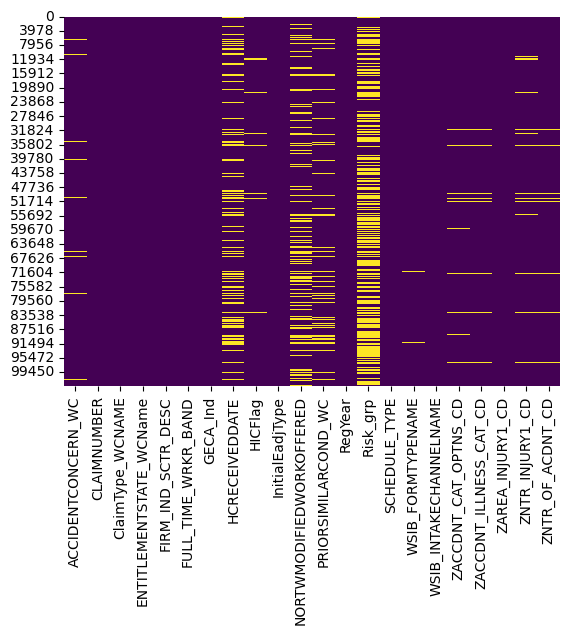

In [16]:
print("\033[4mNUMBER OF NULL VALUES PER COLUMN:\033[0m")

import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.show()

In [17]:
df.shape

(103418, 22)

In [18]:
nans = df.isnull().sum().sort_values(ascending=False)
df = df[nans.index]
print(nans)

Risk_grp                    53369
HCRECEIVEDDATE              22348
NORTWMODIFIEDWORKOFFERED    20132
PRIORSIMILARCOND_WC         10409
ZACCDNT_CAT_OPTNS_CD         2808
ZNTR_INJURY1_CD              2163
ACCIDENTCONCERN_WC           2008
ZNTR_OF_ACDNT_CD             1859
HICFlag                      1627
ZACCDNT_ILLNESS_CAT_CD       1587
WSIB_FORMTYPENAME             333
ZAREA_INJURY1_CD              175
FULL_TIME_WRKR_BAND            18
FIRM_IND_SCTR_DESC             18
GECA_Ind                        0
InitialEadjType                 0
CLAIMNUMBER                     0
RegYear                         0
SCHEDULE_TYPE                   0
WSIB_INTAKECHANNELNAME          0
ENTITLEMENTSTATE_WCName         0
ClaimType_WCNAME                0
dtype: int64


## <span style='color:#ff5f27'>🔧 Feature Engeering

### Now I will process each column individually (impute data or even remove the columns if needed)

### <span style='color:#ff5f27'> ✂️ Dimensionality Reduction
#### I find following columns useless for our analysis since they dont value anything from this particular business perspective

In [19]:
cols_to_drop = ['HCRECEIVEDDATE', 'RegYear', 'ENTITLEMENTSTATE_WCName', 'WSIB_INTAKECHANNELNAME']
df = df.drop(cols_to_drop, axis=1)

In [20]:
df.shape

(103418, 18)

### <span style='color:#ff5f27'>🕳 Messing with NaNs

In [21]:
# NaNs in the following columns will be populated by "-1"
fill_with_neg1 = ['PRIORSIMILARCOND_WC', 'ACCIDENTCONCERN_WC']
df[fill_with_neg1] = df[fill_with_neg1].fillna(-1)

In [22]:
df['PRIORSIMILARCOND_WC'] = df['PRIORSIMILARCOND_WC'].astype(int).astype(str)
df['PRIORSIMILARCOND_WC'].replace(
    {'0': 'N', '1': 'Y', '-1': 'Unknown'},
    inplace=True
)

df['ACCIDENTCONCERN_WC'] = df['ACCIDENTCONCERN_WC'].astype(int).astype(str)
df['ACCIDENTCONCERN_WC'].replace(
    {'0': 'N', '1': 'Y', '-1': 'Unknown'},
    inplace=True
)

In [24]:
# I will make all NaNs in following features the same word
nan_variation = ['Unknown', 'Other', 'other', 'RGNA', 'OtherDiseases', 'NONE',
                 'Blank', '']

fill_with_unknown = [
    'NORTWMODIFIEDWORKOFFERED', 'ZACCDNT_CAT_OPTNS_CD', 'ZNTR_INJURY1_CD',
    'ZNTR_OF_ACDNT_CD', 'HICFlag', 'ZACCDNT_ILLNESS_CAT_CD', 'WSIB_FORMTYPENAME',
    'ZAREA_INJURY1_CD', 'FULL_TIME_WRKR_BAND', 'FIRM_IND_SCTR_DESC', 'Risk_grp'
]

df[fill_with_unknown] = df[fill_with_unknown].replace(nan_variation, "Unknown")

In [25]:
# NaNs in the following columns will be populated by "Unknown"
df[fill_with_unknown] = df[fill_with_unknown].fillna("Unknown")

#### I will map some categorical features into string format 

In [28]:
# Replace values
# df['AccidentHistoryModifiedWorkName'].replace(
#     {'Unknown': -1, 'Declined': 0, 'Accepted': 1},
#     inplace=True
# )

# df['NORTWMODIFIEDWORKOFFERED'].replace(
#     {'Unknown': -1, 'N': 0, 'Y': 1},
#     inplace=True
# )

# # rename 'InitialEadjType' column
# df.rename(columns={'InitialEadjType': 'InitialEadjType_LT'}, inplace=True)
# df['InitialEadjType_LT'].replace(
#     {'NL': 0, 'LT': 1},
#     inplace=True
# )

# # rename 'GECA_Ind' column
# df.rename(columns={'GECA_Ind': 'GECA_Ind_Y'}, inplace=True)
# df['GECA_Ind_Y'].replace(
#     {'N': 0, 'Y': 1},
#     inplace=True
# )

# rename 'ClaimType_WCNAME' column
df.rename(columns={'ClaimType_WCNAME': 'ClaimType_WCNAME_LT'}, inplace=True)
df['ClaimType_WCNAME_LT'].replace(
    {'No Lost Time': 'NL', 'Lost Time': 'LT'},
    inplace=True
)

df['SCHEDULE_TYPE'] = df['SCHEDULE_TYPE'].astype(str)
df['SCHEDULE_TYPE'].replace(
    {'1': 'first', '2': 'second'},
    inplace=True
)

### A brief view of values per each column

In [29]:
for col in df.columns:
    print(col, "values:")
    print(df[col].value_counts())
    print("-" * 36)
    print()

Risk_grp values:
Unknown    53370
RG02       10159
RG01        8907
RG03        7980
RG04        6301
RG05        5035
RG06        4038
RG07        2795
RG08        1915
RG09        1546
RG10        1372
Name: Risk_grp, dtype: int64
------------------------------------

NORTWMODIFIEDWORKOFFERED values:
N          70235
Unknown    20132
Y          13051
Name: NORTWMODIFIEDWORKOFFERED, dtype: int64
------------------------------------

PRIORSIMILARCOND_WC values:
N          77232
Y          15777
Unknown    10409
Name: PRIORSIMILARCOND_WC, dtype: int64
------------------------------------

ZACCDNT_CAT_OPTNS_CD values:
Overexertion                     22991
Struck                           17818
RepetitiveMovement               12947
SlipTrip                         11211
RepetitiveForce                   8816
Unknown                           8030
Fall                              4835
Lift                              2442
Assault                           2103
Twist                    

32396098    3
31516446    3
31808903    3
31726298    3
31951707    3
           ..
31512031    1
31485994    1
31506605    1
31511762    1
31725141    1
Name: CLAIMNUMBER, Length: 100168, dtype: int64
------------------------------------

SCHEDULE_TYPE values:
first     88134
second    15284
Name: SCHEDULE_TYPE, dtype: int64
------------------------------------

ClaimType_WCNAME_LT values:
NL    59455
LT    43963
Name: ClaimType_WCNAME_LT, dtype: int64
------------------------------------



## <span style='color:#ff5f27'>🧮 Feature to feature relationship

#### I will convert all features to str format (they are categorical anyway) and then encode to discrete integers using Ordinal Encoder to build the correlation matrix

In [30]:
from sklearn.preprocessing import OrdinalEncoder

# Copy the original DataFrame to a new DataFrame for encoding
# df_corr = df[similar_cols].copy()
df_corr = df.copy()
df_corr = df_corr.astype(str)

# Instantiate the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Ordinally encode the specified columns
# df_corr[similar_cols] = ordinal_encoder.fit_transform(df_corr[similar_cols])
df_corr[df_corr.columns] = ordinal_encoder.fit_transform(df_corr[df_corr.columns])

# Get the names of the features
feature_names = df_corr.columns

In [31]:
# corr = df_corr.corr(method='spearman')
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(15, 8))


# sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
#             cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.05,
#             annot=True, annot_kws={"size": 8}, square=True, linecolor='pink')

## <span style='color:#ff5f27'>💠 Point-Biserial Correlation Heatmap

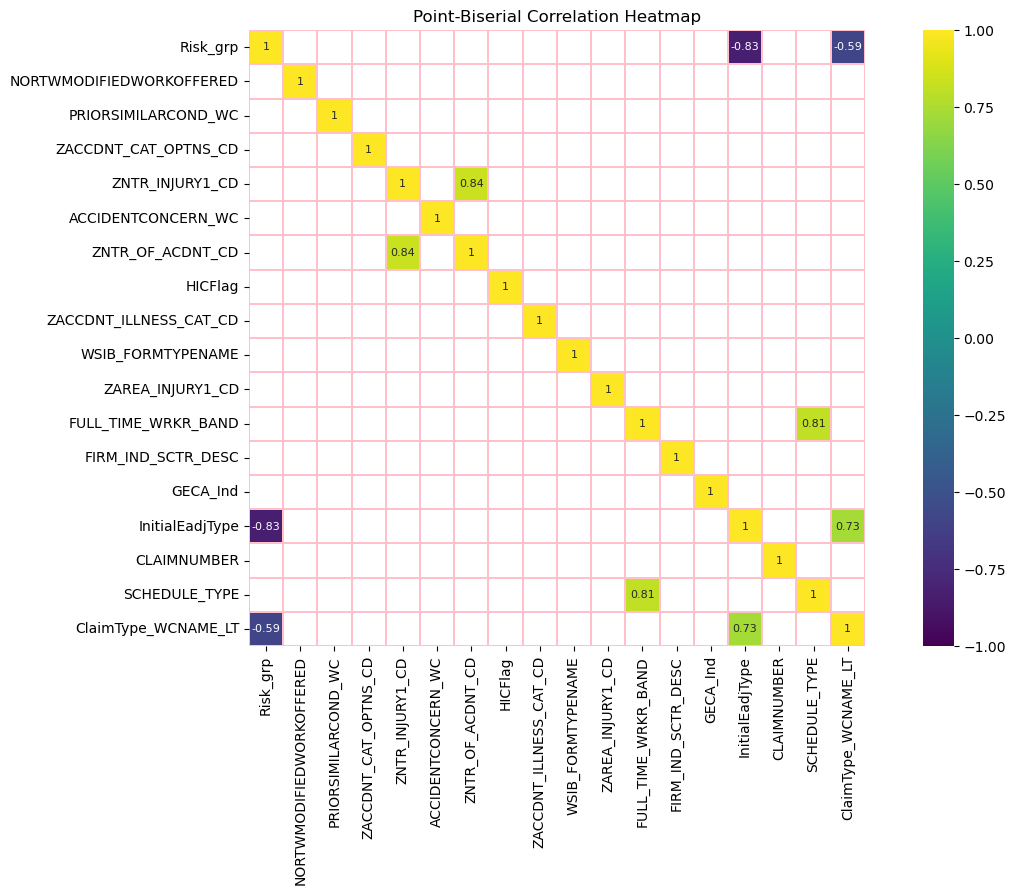

In [32]:
from scipy.stats import pointbiserialr

# Calculate the point-biserial correlation matrix
corr_matrix = np.zeros((len(df_corr.columns), len(df_corr.columns)))

for i, col1 in enumerate(df_corr.columns):
    for j, col2 in enumerate(df_corr.columns):
        if i == j:
            corr_matrix[i, j] = 1.0  # Correlation of a variable with itself is 1
        else:
            corr, _ = pointbiserialr(df_corr[col1], df_corr[col2])
            corr_matrix[i, j] = corr

# Define the threshold value for correlation
threshold = 0.5

# Create a mask for the values above the threshold
mask = np.abs(corr_matrix) >= threshold

# Set up the matplotlib figure for the heatmap
f, ax = plt.subplots(figsize=(15, 8))

# Create a heatmap
sns.heatmap(corr_matrix, mask=~mask, cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.05,
            annot=True, annot_kws={"size": 8}, square=True, linecolor='pink',
            xticklabels=feature_names, yticklabels=feature_names)

plt.title("Point-Biserial Correlation Heatmap")

# Show the plot
plt.show()


#### Lets start with 'ZNTR_OF_ACDNT_CD' and 'ZNTR_INJURY1_CD'. They are very correlated. Lets compare their distributions:

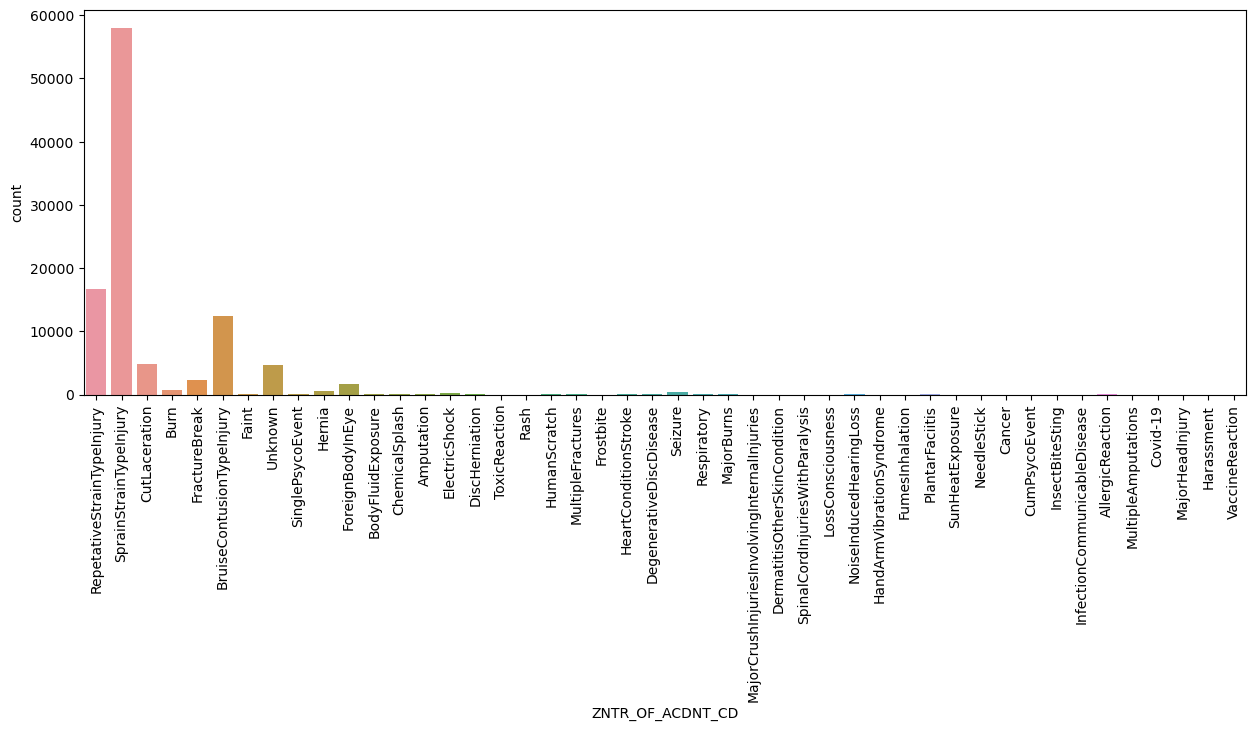

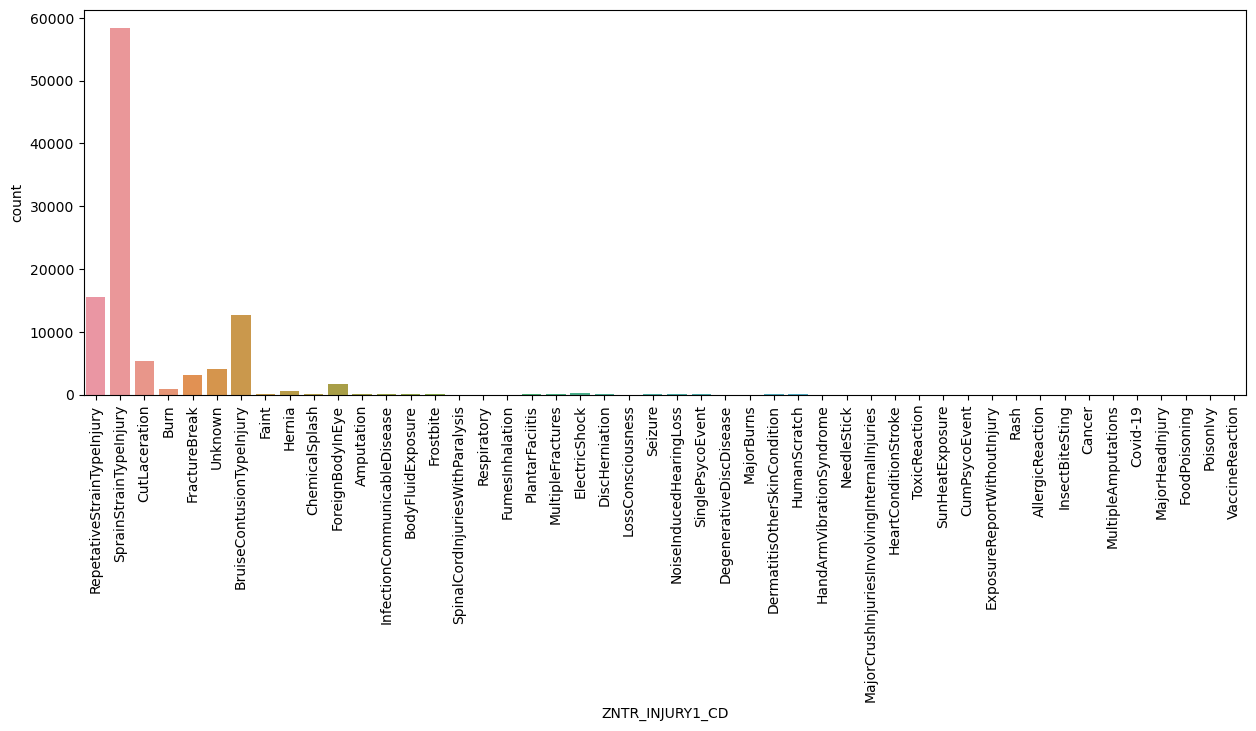

In [33]:
for col in ['ZNTR_OF_ACDNT_CD', 'ZNTR_INJURY1_CD']:
    plt.subplots(figsize=(15,5))
    sns.countplot(x=df[col], data=df)
    if df[col].nunique() > 10:
        plt.xticks(rotation=90)
    plt.show()
    

#### Now it is clear that columns  'ZNTR_OF_ACDNT_CD', 'ZNTR_INJURY1_CD' are too similar. I will drop one of them.

In [34]:
df = df.drop('ZNTR_INJURY1_CD', axis=1)

#### Next, lets look at other correlated features

Most Correlated Pair: InitialEadjType and Risk_grp
Most Correlated Pair: ClaimType_WCNAME_LT and Risk_grp
Most Correlated Pair: ClaimType_WCNAME_LT and InitialEadjType
Most Correlated Pair: FULL_TIME_WRKR_BAND and SCHEDULE_TYPE
Most Correlated Pair: ZNTR_INJURY1_CD and ZNTR_OF_ACDNT_CD


<Figure size 1000x600 with 0 Axes>

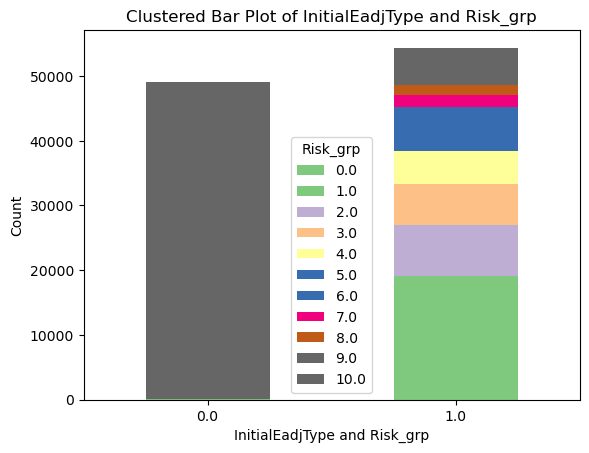

<Figure size 1000x600 with 0 Axes>

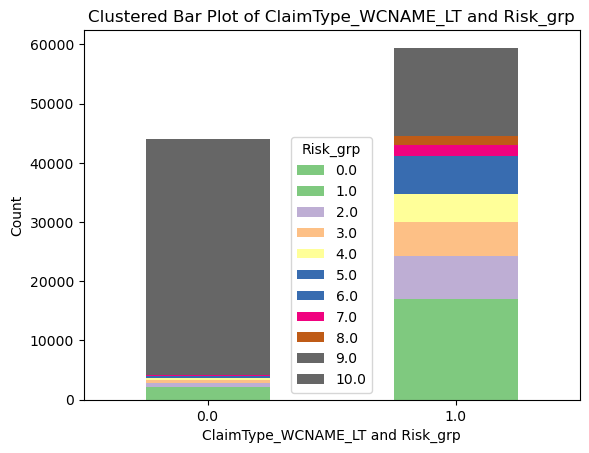

<Figure size 1000x600 with 0 Axes>

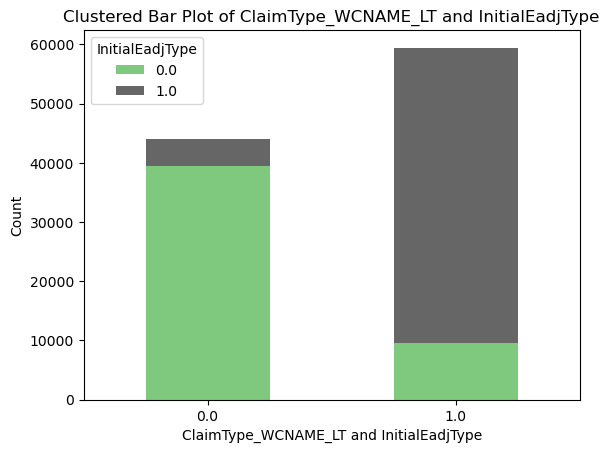

<Figure size 1000x600 with 0 Axes>

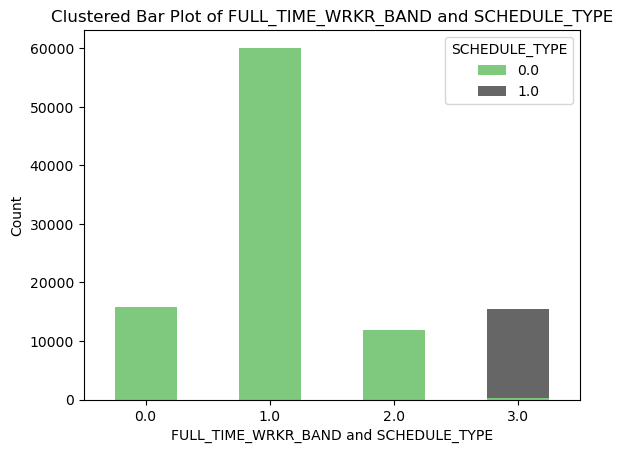

In [35]:
# Find the indices of the most correlated pairs
most_correlated_indices = np.argwhere(mask)

# Create a list to store most correlated pairs
most_correlated_pairs = []

# Create a set to store most correlated pairs
most_correlated_pairs = set()

# Iterate over the correlated pairs and store them in the set
for i, j in most_correlated_indices:
    if i != j:  # Avoid pairs of the same feature
        pair = (feature_names[i], feature_names[j])
        most_correlated_pairs.add(tuple(sorted(pair)))  # Sort and add to avoid duplicates

# Print the most correlated pairs
for pair in most_correlated_pairs:
    print(f"Most Correlated Pair: {pair[0]} and {pair[1]}")

# Plot the most correlated pairs using clustered bar plots
for pair in most_correlated_pairs:
    if 'ZNTR_OF_ACDNT_CD' in pair and 'ZNTR_INJURY1_CD' in pair: continue # I already plotted them before
    plt.figure(figsize=(10, 6))
    stacked_data = df_corr.groupby([pair[0], pair[1]]).size().unstack()
    stacked_data.plot(kind='bar', stacked=True, cmap="Accent")
    plt.xlabel(f"{pair[0]} and {pair[1]}")
    plt.ylabel("Count")
    plt.title(f"Clustered Bar Plot of {pair[0]} and {pair[1]}")
    plt.xticks(rotation=0)
    plt.show()

---

# <span style='color:#ff5f27'>🎨 EDA

In [36]:
import plotly.express as px


def cat_summary(dataframe, col_name, plot=False):
    print()
    print("#" * 72)
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio (%)": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        plt.subplots(figsize=(15,5))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        if dataframe[col_name].nunique() > 10:
            plt.xticks(rotation=90)
        plt.show()


########################################################################
         Risk_grp  Ratio (%)
Unknown     53370  51.606103
RG02        10159   9.823242
RG01         8907   8.612621
RG03         7980   7.716258
RG04         6301   6.092750
RG05         5035   4.868592
RG06         4038   3.904543
RG07         2795   2.702624
RG08         1915   1.851709
RG09         1546   1.494904
RG10         1372   1.326655


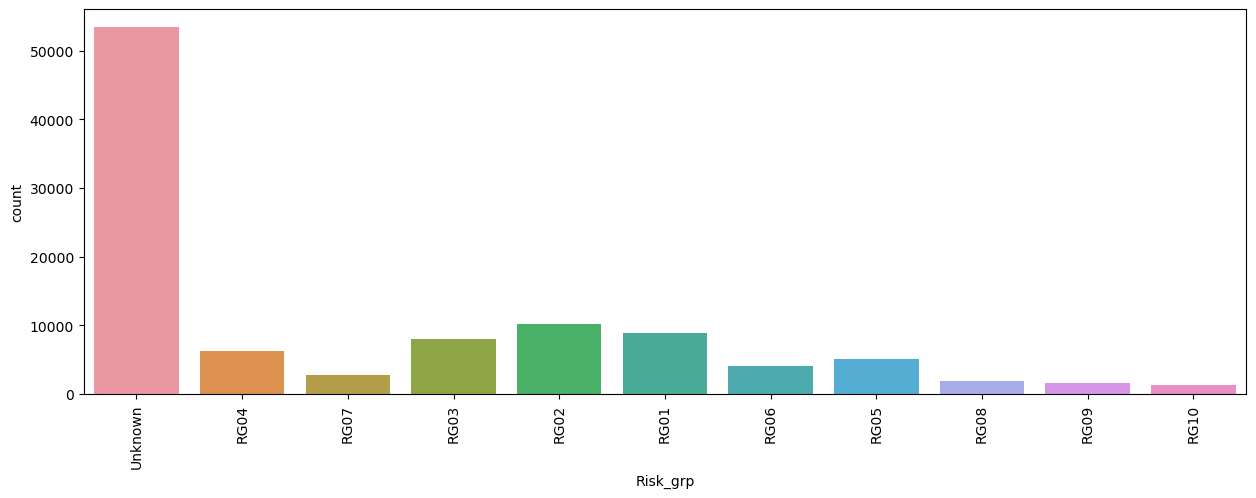


########################################################################
         NORTWMODIFIEDWORKOFFERED  Ratio (%)
N                           70235  67.913709
Unknown                     20132  19.466631
Y                           13051  12.619660


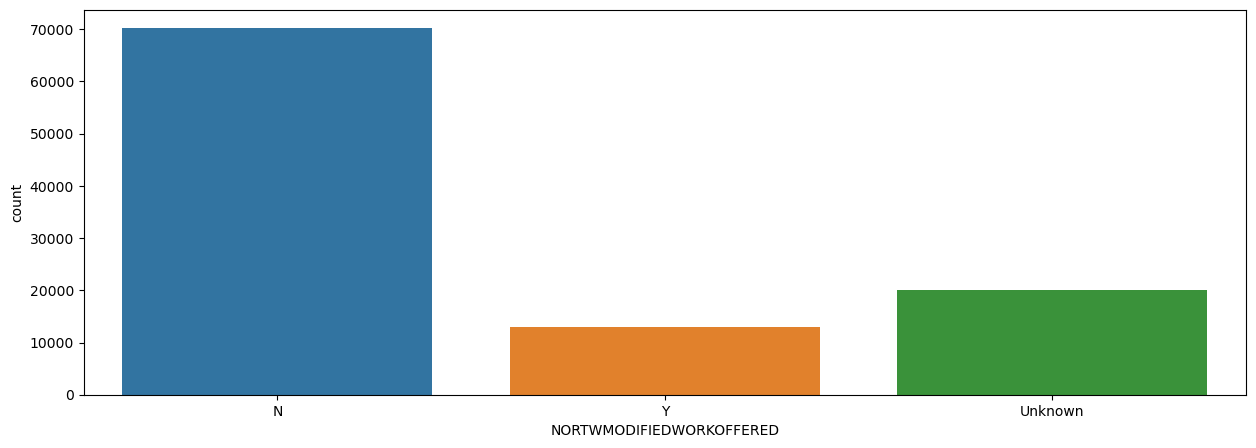


########################################################################
         PRIORSIMILARCOND_WC  Ratio (%)
N                      77232  74.679456
Y                      15777  15.255565
Unknown                10409  10.064979


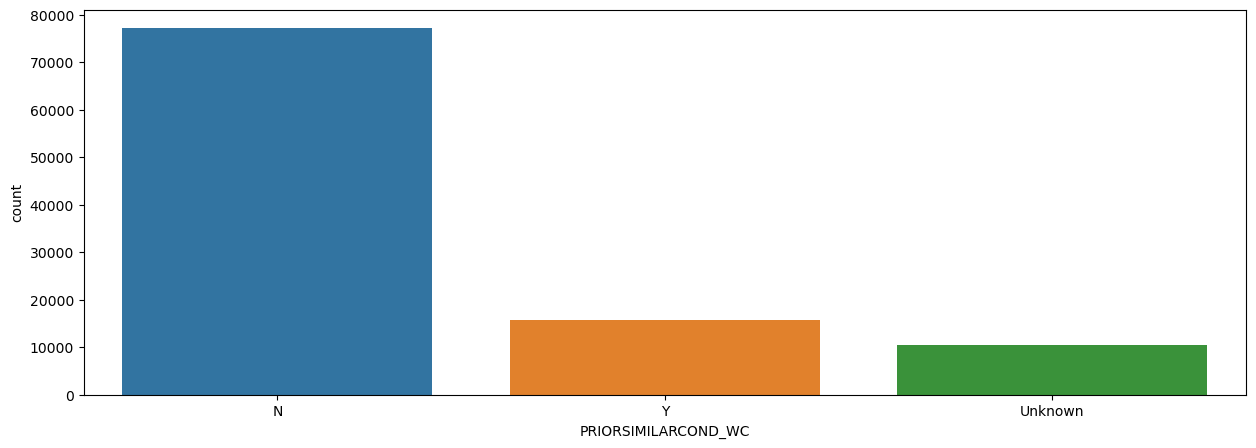


########################################################################
                               ZACCDNT_CAT_OPTNS_CD  Ratio (%)
Overexertion                                  22991  22.231140
Struck                                        17818  17.229109
RepetitiveMovement                            12947  12.519097
SlipTrip                                      11211  10.840473
RepetitiveForce                                8816   8.524628
Unknown                                        8030   7.764606
Fall                                           4835   4.675202
Lift                                           2442   2.361291
Assault                                        2103   2.033495
Twist                                          1853   1.791758
UnaccustomedMovement                           1457   1.408846
PushPull                                       1222   1.181612
MotorVehicleAccident                           1167   1.128430
Caught                                      

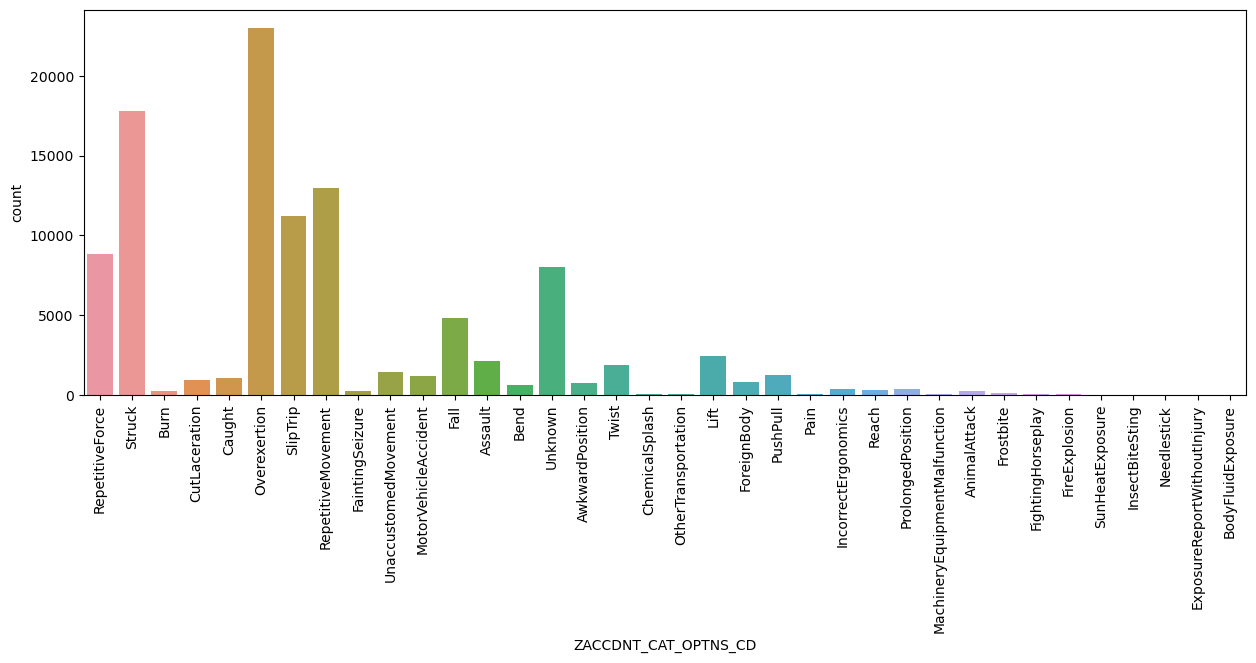


########################################################################
         ACCIDENTCONCERN_WC  Ratio (%)
N                     68988  66.707923
Y                     32422  31.350442
Unknown                2008   1.941635


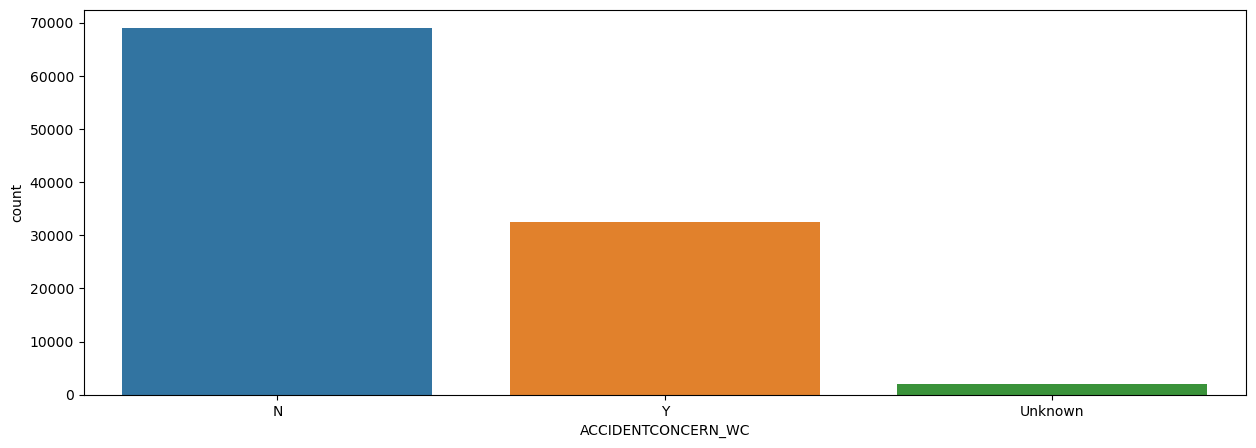


########################################################################
                                             ZNTR_OF_ACDNT_CD  Ratio (%)
SprainStrainTypeInjury                                  57979  56.062774
RepetativeStrainTypeInjury                              16773  16.218647
BruiseContusionTypeInjury                               12492  12.079135
CutLaceration                                            4880   4.718714
Unknown                                                  4717   4.561102
FractureBreak                                            2260   2.185306
ForeignBodyInEye                                         1683   1.627376
Burn                                                      736   0.711675
Hernia                                                    516   0.498946
Seizure                                                   397   0.383879
ElectricShock                                             186   0.179853
Faint                                             

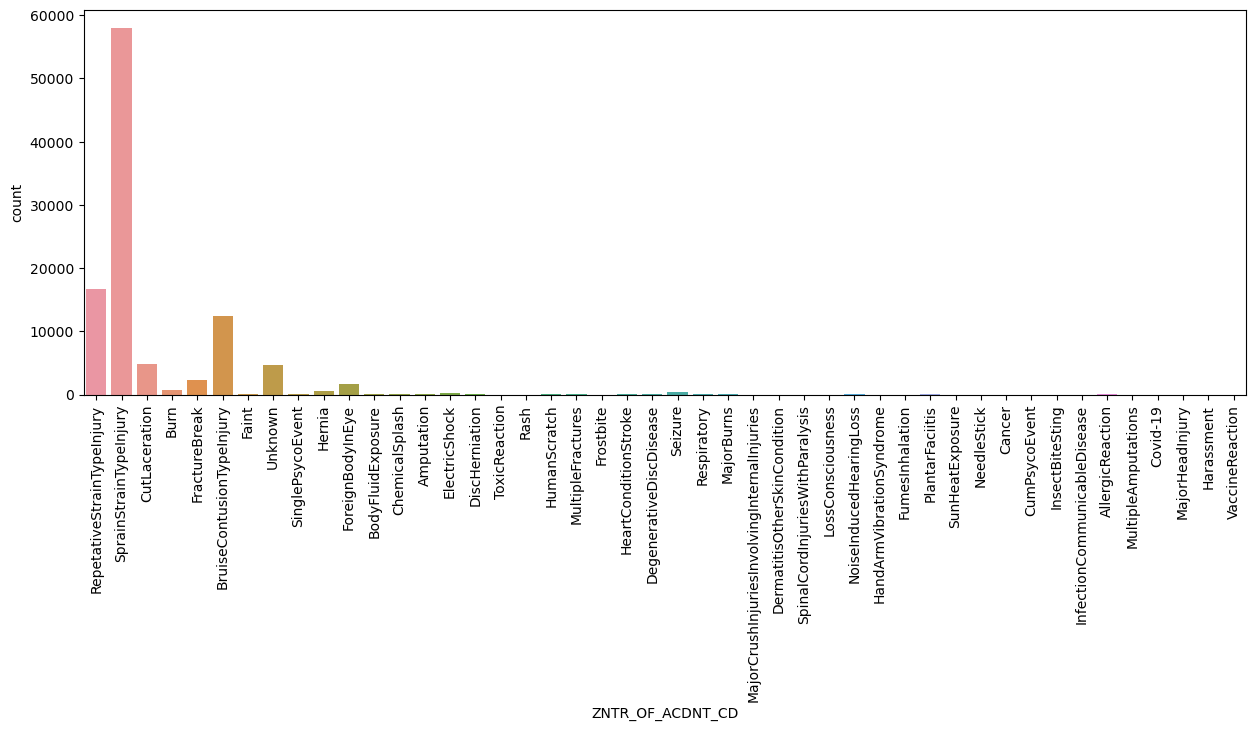


########################################################################
            HICFlag  Ratio (%)
unknown       58173  56.250363
Lower Back    20488  19.810865
Shoulder      15133  14.632849
MTBI           5100   4.931443
Fracture       2897   2.801253
Unknown        1627   1.573227


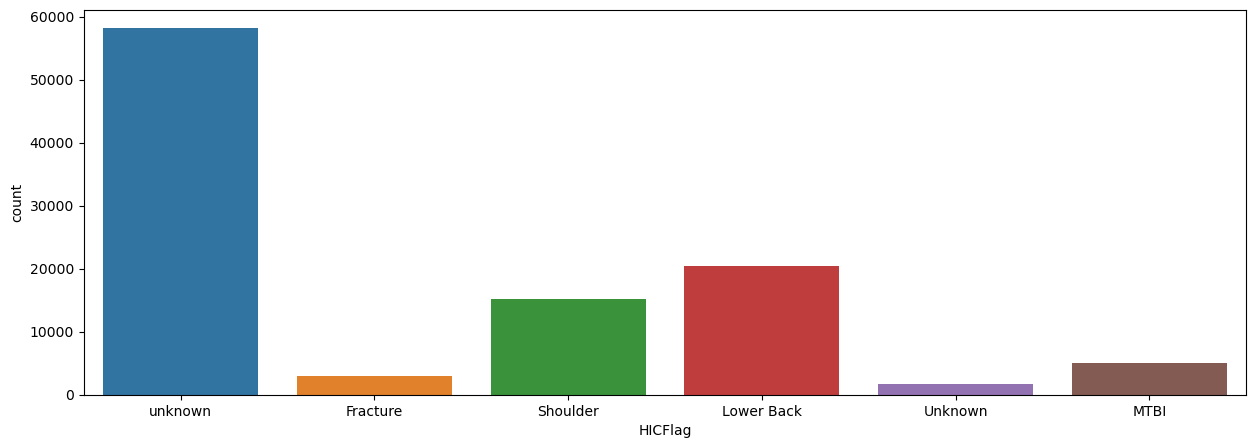


########################################################################
                              ZACCDNT_ILLNESS_CAT_CD  Ratio (%)
SuddenSpecificEventOccurence                   74138  71.687714
GraduallyOccuringOverTime                      26993  26.100872
Unknown                                         1714   1.657352
OccupationalDisease                              386   0.373243
CatastrophicSeriousEvent                         121   0.117001
PsychologicalCondition                            66   0.063819


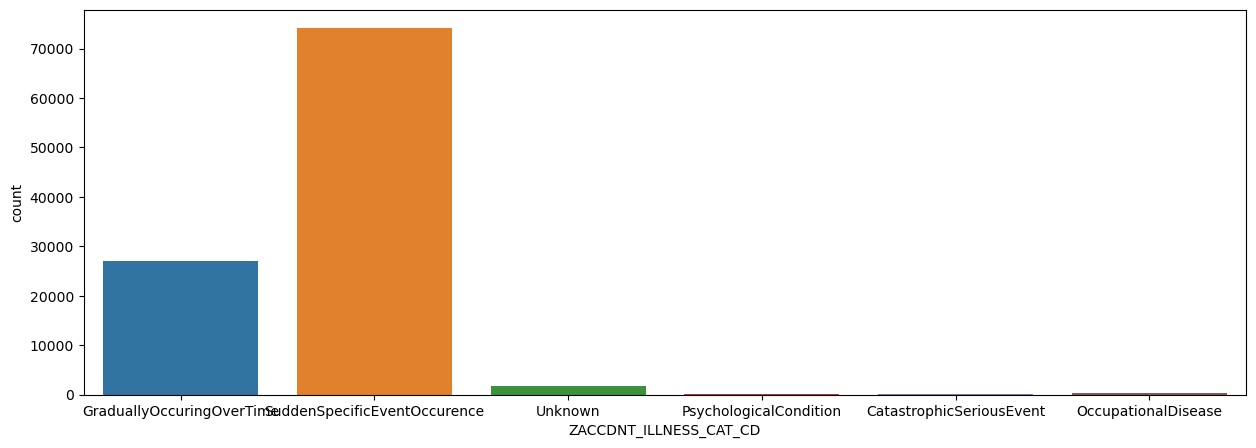


########################################################################
                WSIB_FORMTYPENAME  Ratio (%)
Form 7                      83263  80.511130
Form 6                      18625  18.009437
Unknown                      1067   1.031735
Form 8                        312   0.301688
Correspondence                 61   0.058984
Board                          58   0.056083
Medical                        32   0.030942


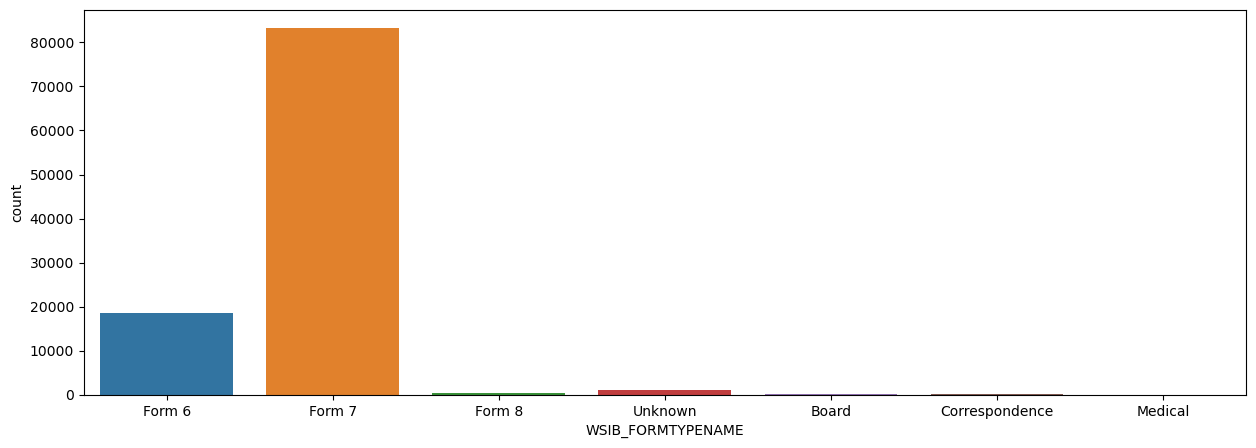


########################################################################
               ZAREA_INJURY1_CD  Ratio (%)
BackLower                 20488  19.810865
RightShoulder              8619   8.334139
LeftShoulder               6514   6.298710
Head                       5298   5.122899
Neck                       5042   4.875360
RightWrist                 4023   3.890038
BackUpper                  3913   3.783674
LeftKnee                   3887   3.758533
RightKnee                  3867   3.739194
LeftWrist                  3344   3.233480
LeftFingers                3195   3.089404
RightFingers               3045   2.944362
Eyes                       2489   2.406738
RightHand                  2465   2.383531
RightElbow                 2381   2.302307
LeftHand                   2311   2.234621
RightAnkle                 1993   1.927131
LeftAnkle                  1918   1.854609
Chest                      1819   1.758881
LeftElbow                  1766   1.707633
RightArm               

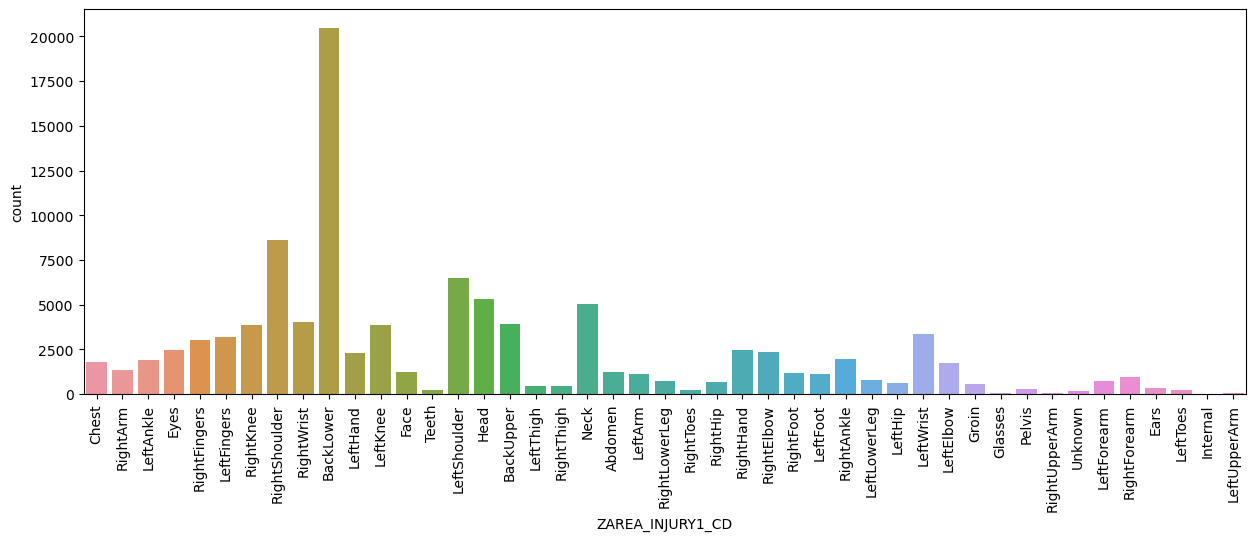


########################################################################
                  FULL_TIME_WRKR_BAND  Ratio (%)
Greater than 100                60117  58.130113
20 to 100                       15809  15.286507
Unknown                         15551  15.037034
Less than 20                    11941  11.546346


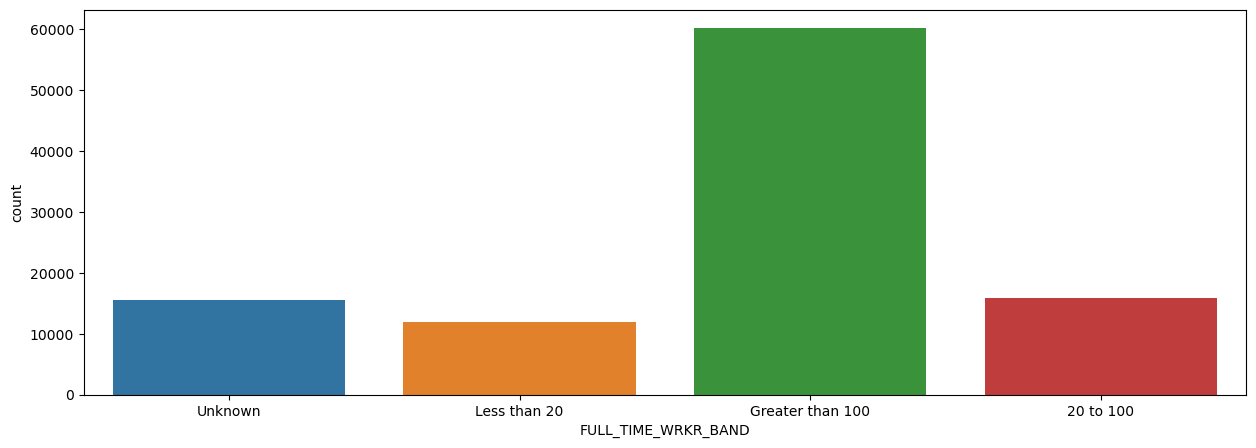


########################################################################
                        FIRM_IND_SCTR_DESC  Ratio (%)
SERVICES                             20722  20.037131
SCHEDULE 2                           15273  14.768222
HEALTH CARE                          14699  14.213193
MANUFACTURING                        14569  14.087490
CONSTRUCTION                         12801  12.377923
TRANSPORTATION                        7687   7.432942
AUTOMOTIVE                            4870   4.709045
FOOD                                  4056   3.921948
AGRICULTURE                           2568   2.483127
CHEMICAL/PROCESS                      1522   1.471697
MINING                                1026   0.992090
ELECTRICAL                             948   0.916668
EDUCATION                              847   0.819006
MUNICIPAL                              817   0.789998
STEEL                                  581   0.561798
FORESTRY                               189   0.182753
PULP & P

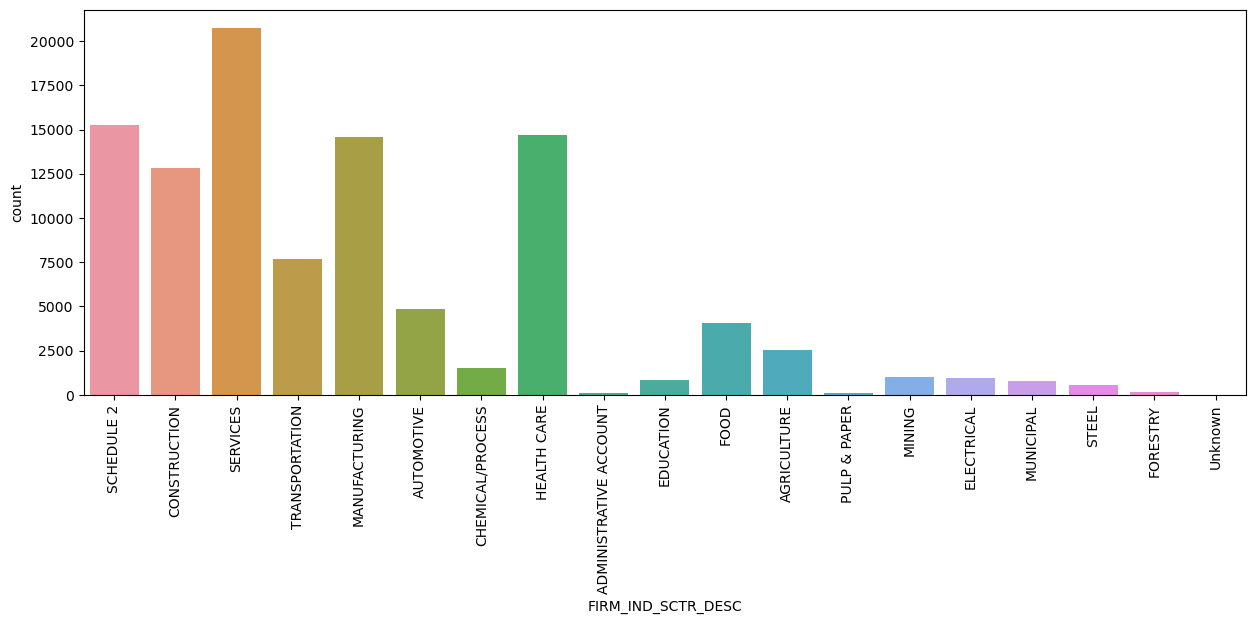


########################################################################
   GECA_Ind  Ratio (%)
N    102020  98.648204
Y      1398   1.351796


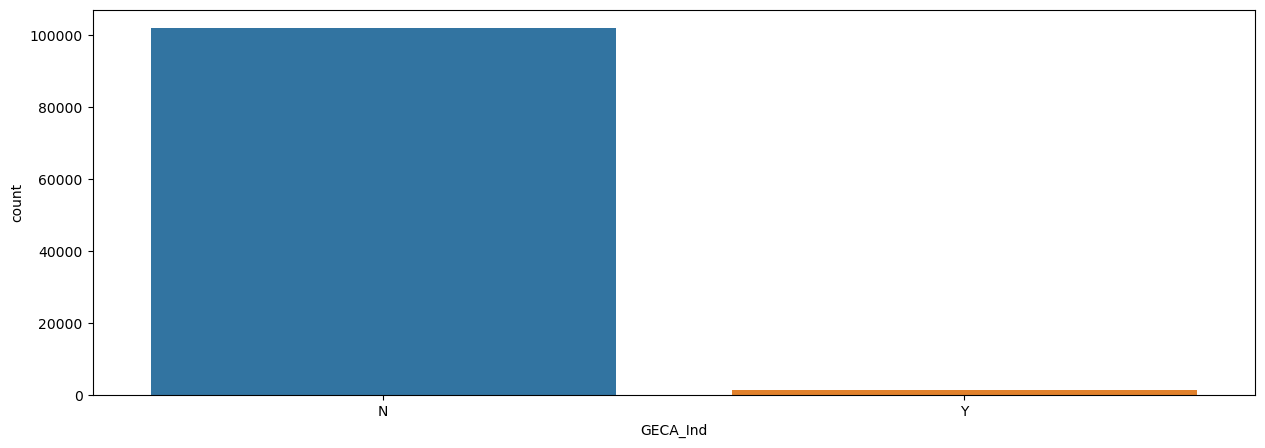


########################################################################
    InitialEadjType  Ratio (%)
NL            54390  52.592392
LT            49028  47.407608


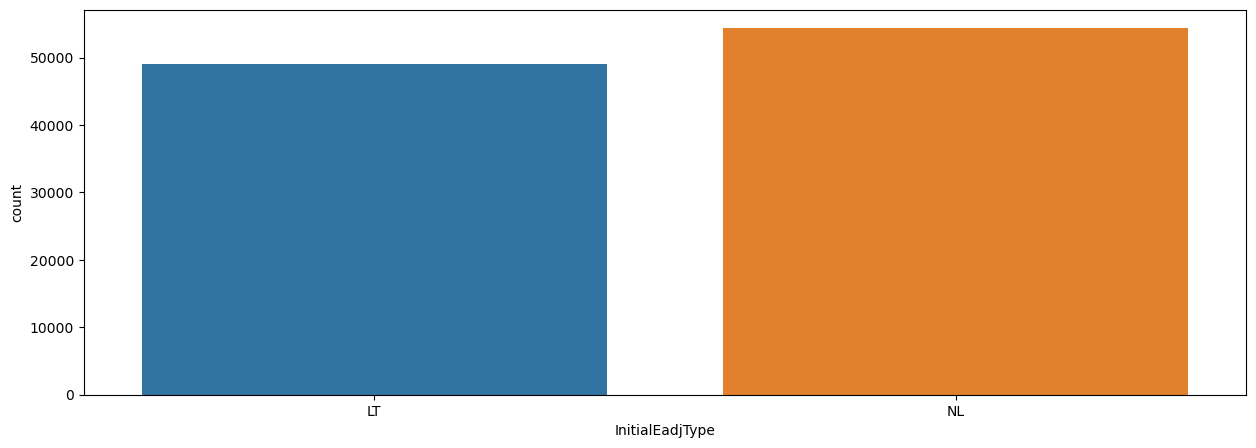


########################################################################
        SCHEDULE_TYPE  Ratio (%)
first           88134  85.221141
second          15284  14.778859


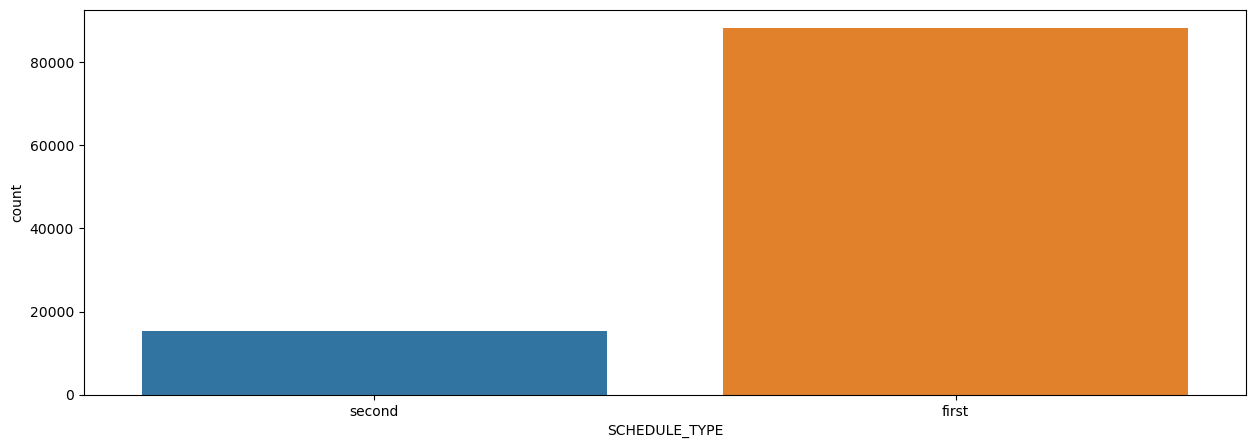


########################################################################
    ClaimType_WCNAME_LT  Ratio (%)
NL                59455  57.489992
LT                43963  42.510008


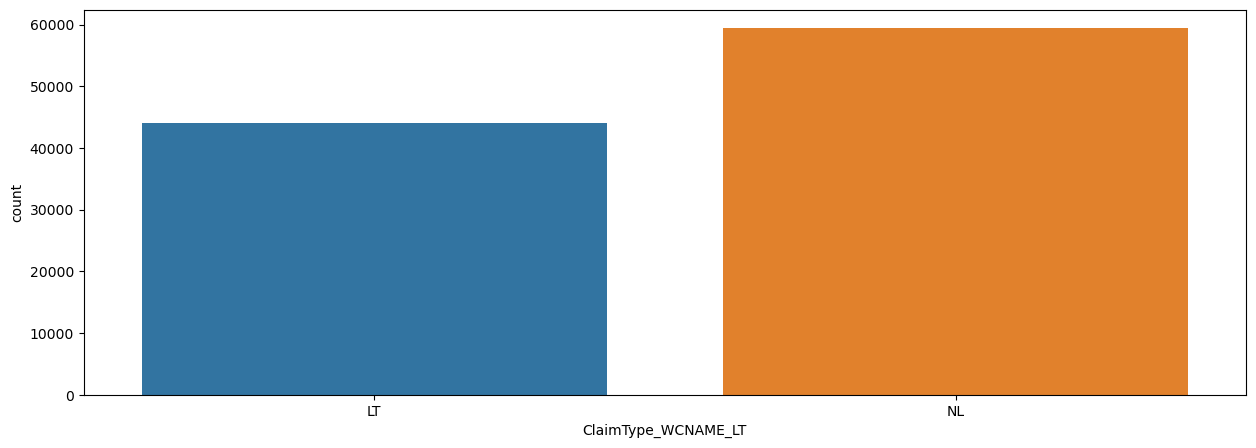

In [38]:
for col in df.columns:
    if col == "CLAIMNUMBER": continue
    cat_summary(df, col, plot=True)
    

In [39]:
df.to_csv("df_cleaned_v3.csv", index=False)

### Pandas Profiling (additional data visualizations)

In [ ]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, title='Processed dataframe Profiling Report')

In [ ]:
# profile.to_file("processed_df_v2.html")

In [ ]:
# profile